# Assignment 3

In [147]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

A travelling salesman has carpets in his van. He goes from door to door trying to sell them.
Each time he sells one he gets excited and is able to be more convincing and each time he
is rejected and cannot close a deal he gets less excited and is less convincing when dealing
with the next customer. This salesman was blessed with 10 levels of excitement and each
interaction either lifts or decreases his excitement by one level. The probabilities for the
salesman to sell a carpet depending on how he feels are {0, 0.1, 0.2, 0.3, …0.9}. Write an
algorithm to simulate this Markov chain. In b) - f) run simulations for all initial levels of
excitement, except the first level, because business is downright non-existent when one
feels this low for starters. Use one bin per timestep. Run simulations over the time period
(sales events) of 𝑻 = 𝟏𝟎𝟎𝟎. For statistics, run 10 000 simulations, which in the present
story means that the salesman makes 10 000 trips.


a) (w=1) Write down the Markov matrix.

**Solution:**

Let's denote the excitement level of the salesman as {0, 1,2, ..., 9}. 


**At arbitrary points:** 

the probabilities for the salesman to sell a carpet at excitement level i P(sell) = $\frac{i}{10}$

Probability of not selling P(no sell) = 1 - P(sell)

**At the boundary**: 

P(0->0) = 1 - 0 = 1 since P(0->1) = 0

P(9->9) = 0.9 since P(9->10) = 0.9, however it is not possible. 


This could be represented in 10x10 Markov matrix with i-th row and j-th column reprenting the probability of transitioning from state i to state j 



In [148]:
M = np.zeros([10, 10])

for i in range(1, 9):
    p = i/10
    M[i, i+1] = p
    M[i, i-1] = 1 - p
    
# boundary state
M[0,0] = 1
M[9,9] = 0.9
M[9,8] = 0.1

In [149]:
M

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.9, 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.7, 0. , 0.3, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0.4, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0.7, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0.8],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.9]])

(b) For every simulation of each initial level of excitement, compute the total
number of sold carpets by the end of the simulation (cumulative number of sales).
For each initial level of excitement plot as a normalised histogram (density=True)
the probability mass density (PMD) of the cumulative number of sales (9 histograms
in total). To make this clear, such a histogram has the cumulative number of sales on
the x-axis and the (normalised) frequency with which each number of cumulative
sales is realised in 10 000 trials on the y-axis. Use a logarithmic scale on the y-axis to
see the PMDs and possible trends as clearly as possible.

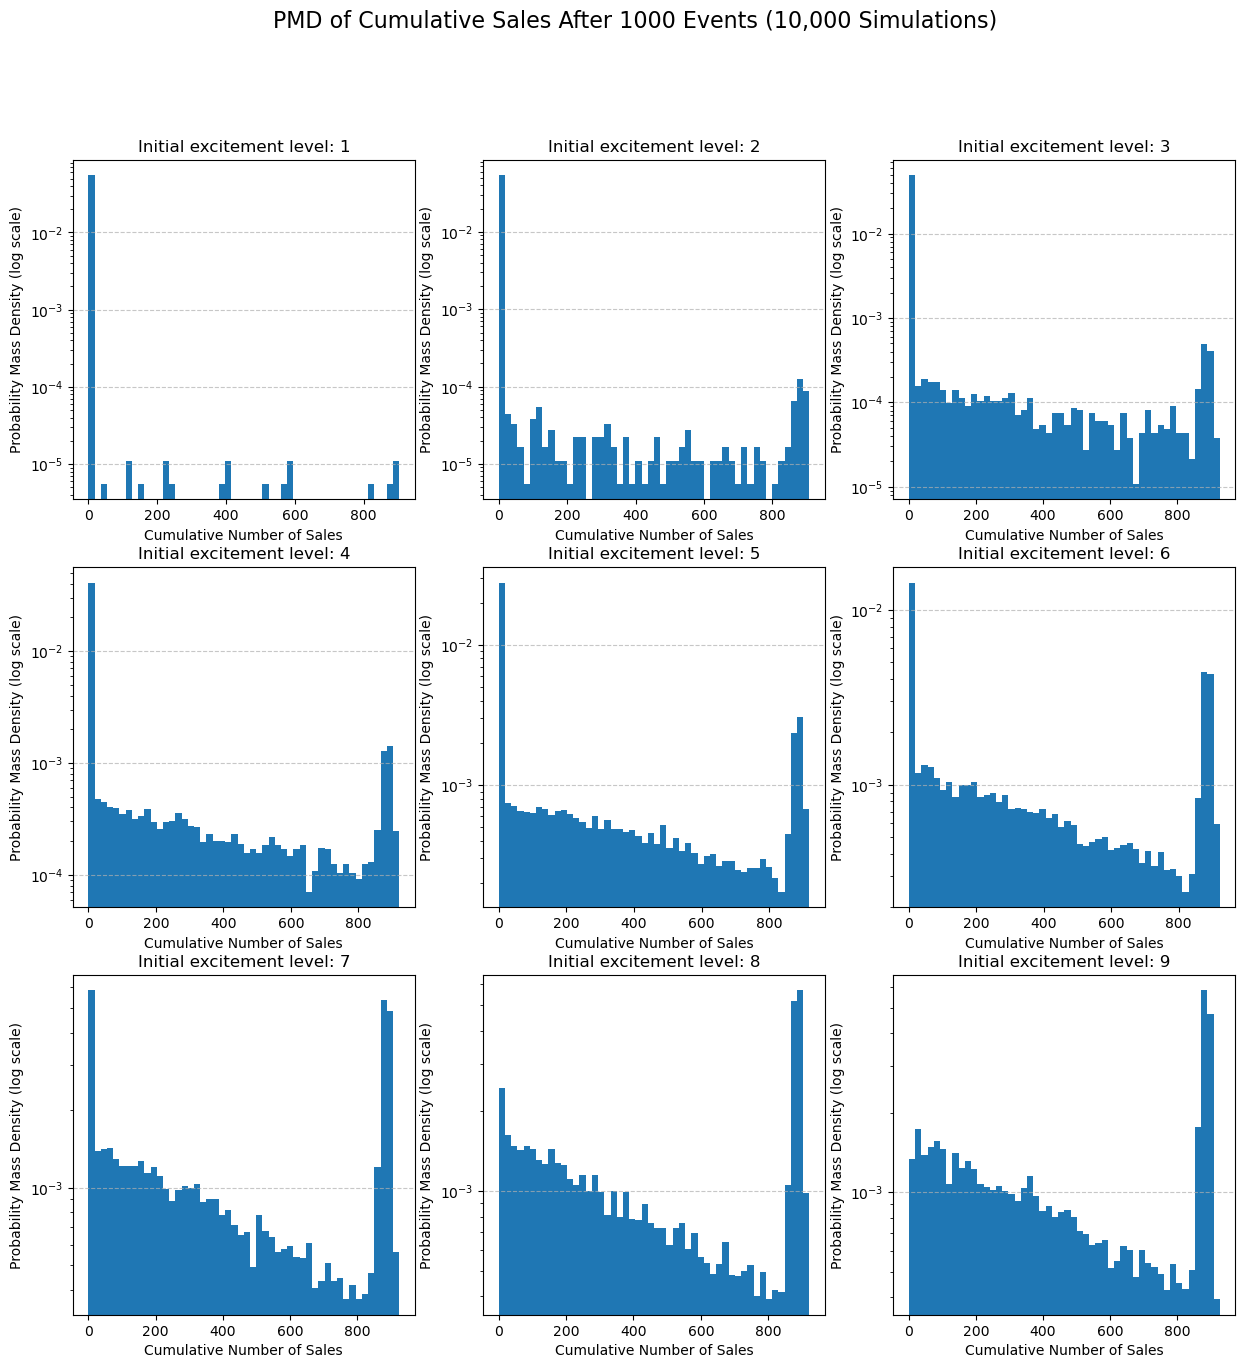

In [150]:
def cumulative_sales_sim(initial_level, T, num_simulations): 
    
    cumulative_sales_results = np.zeros(num_simulations)
    probabilities = np.arange(10)/10.0
    
    for i in range(num_simulations): 
        level = initial_level
        sales_count = 0
        
        for _ in range(T):
            if np.random.rand() < probabilities[level]:
                sales_count +=1 
                
                if level<9:
                    level+=1 
            else: 
                if level > 0: 
                    level -= 1
                    
        cumulative_sales_results[i] = sales_count
        
    return cumulative_sales_results


T = 1000 # number of timesteps 
num_simulations = 10000 # number of trips 

cumulative_sales_T = []

initial_levels = range(1,10)

fig, axes = plt.subplots(3, 3, figsize = (15, 15))

axes = axes.flatten()


for i, start_level in enumerate(initial_levels): 
    cumulative_sales = cumulative_sales_sim(start_level, T, num_simulations)
    cumulative_sales_T.append(cumulative_sales)
    
    ax = axes[i]
    ax.hist(cumulative_sales, bins=50, density=True)
    ax.set_yscale('log')
    ax.set_title(f'Initial excitement level: {start_level}')
    ax.set_xlabel('Cumulative Number of Sales')
    ax.set_ylabel('Probability Mass Density (log scale)')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
fig.suptitle('PMD of Cumulative Sales After 1000 Events (10,000 Simulations)', fontsize=16)
plt.show()

c) (w=2) For each different initial level, compute the average (over the 10 000 trials)
number of carpets the salesman can sale within the given time T. Plot these average
numbers of carpets as a function of the salesman’s initial level of excitement (1
plot).


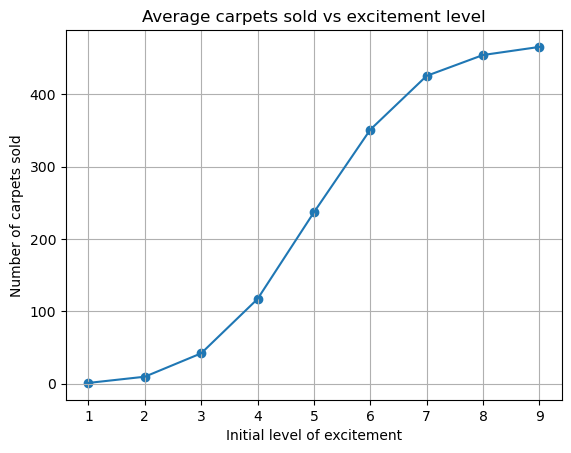

In [151]:
cumulative_sales_T = np.array(cumulative_sales_T)
avg_carpets = np.mean(cumulative_sales_T, axis = -1)


plt.plot(initial_levels, avg_carpets)
plt.scatter(initial_levels, avg_carpets)
plt.xlabel('Initial level of excitement')
plt.ylabel('Number of carpets sold')
plt.title('Average carpets sold vs excitement level')
plt.grid()

d) (i) (w=3) Compute and plot the PMFs for time (the number of steps) required for
the salesman to sell 5 carpets. Exclude the runs that ended up without selling at
least 5 carpets. At sufficiently high initial levels of excitement the PMFs should start
showing a definite functional form. (ii) (w=1) Choose appropriate scale (axes) for
plotting so that you can name this functional form – and name it. (Use this scale for
all plots in d).)


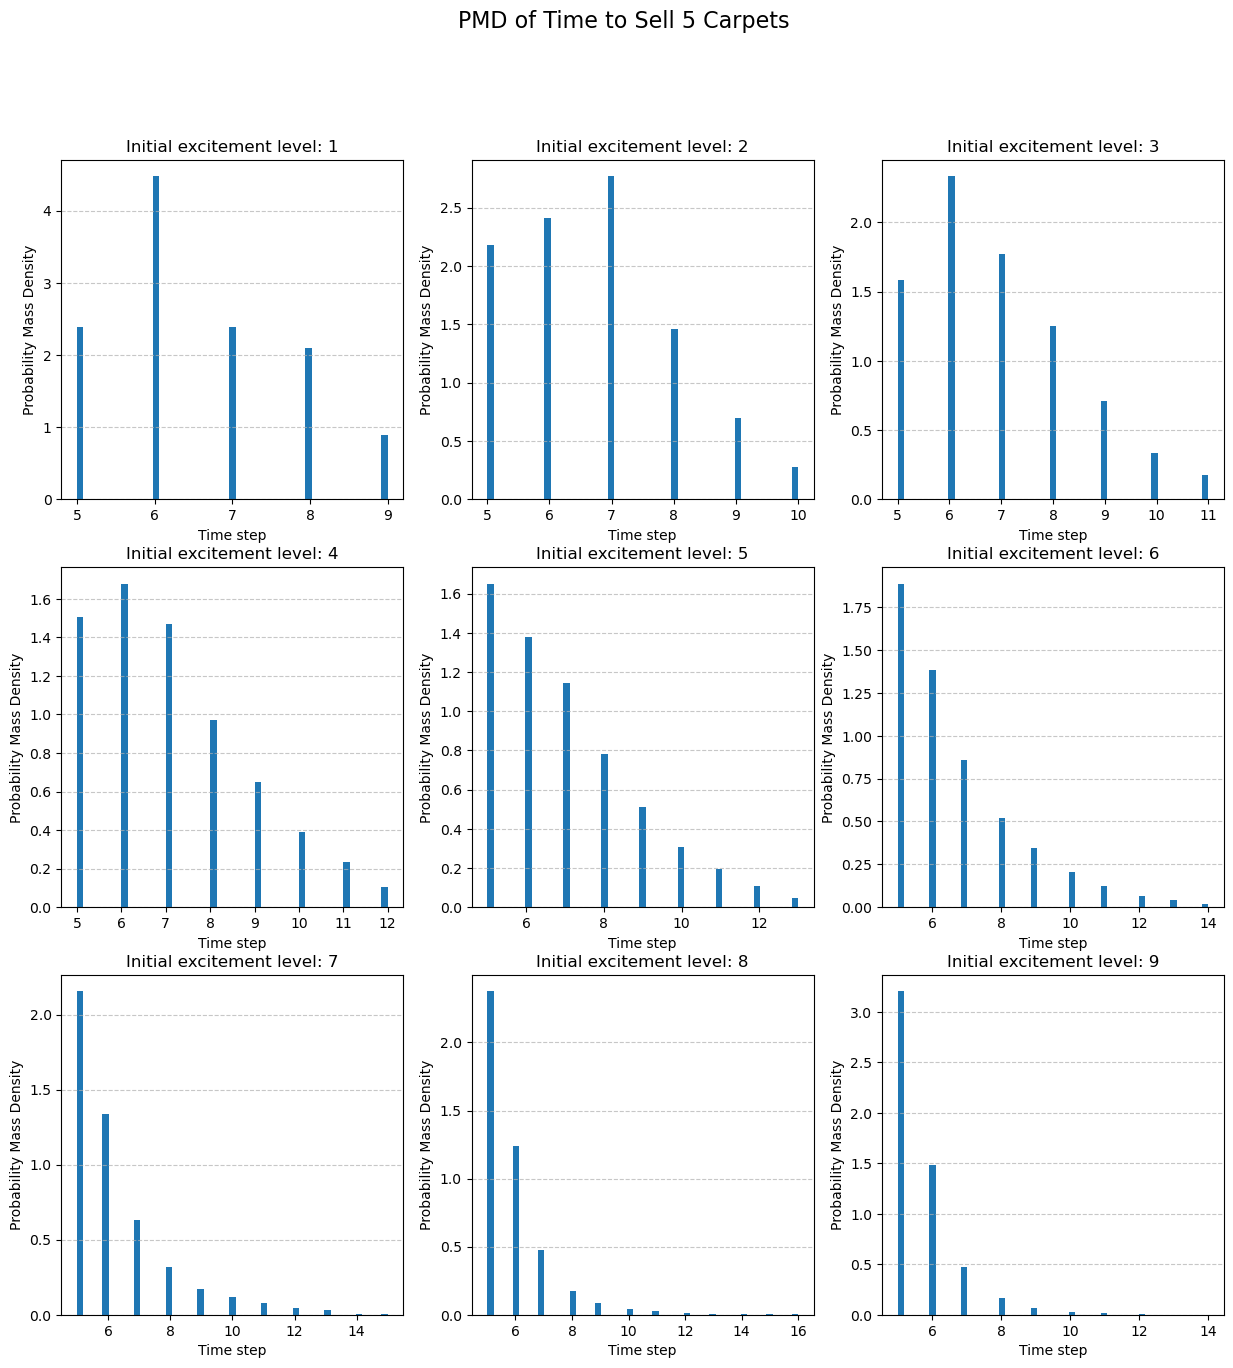

In [152]:
def time_sales_5(initial_level, T, num_simulations): 
    
    times_to_sell = []
    probabilities = np.arange(10)/10.0
    times_not_sold = 0
    
    for i in range(num_simulations): 
        level = initial_level
        sales_count = 0
        achieved = False
        
        for t in range(T):
            if np.random.rand() < probabilities[level]:
                sales_count +=1 
                
                if level<9:
                    level+=1 
                    
                if sales_count == 5: 
                    times_to_sell.append(t+1)
                    achieved = True
                    break
            else: 
                if level > 0: 
                    level -= 1
                    
        if not achieved: 
            times_not_sold += 1

        
    return np.array(times_to_sell), np.array(times_not_sold)
    

T = 1000 # number of timesteps 
num_simulations = 10000 # number of trips 

times_to_sell_levels = []

times_not_sold_levels = []

initial_levels = range(1,10)

fig, axes = plt.subplots(3, 3, figsize = (15, 15))

axes = axes.flatten()


for i, start_level in enumerate(initial_levels): 
    times_to_sell, times_not_sold = time_sales_5(start_level, T, num_simulations)
    
    times_to_sell_levels.append(times_to_sell)
    times_not_sold_levels.append(times_not_sold)
    
    
    ax = axes[i]
    bins = np.linspace(min(times_to_sell), max(times_to_sell), 50)
    ax.hist(times_to_sell, bins=bins, density=True)
    ax.set_title(f'Initial excitement level: {start_level}')
    ax.set_xlabel('Time step')
    ax.set_ylabel('Probability Mass Density')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
fig.suptitle('PMD of Time to Sell 5 Carpets', fontsize=16)
plt.show()

e) (w=2) Compute the average times (for the different initial levels) it takes for the
salesman to sell 5 carpets. Plot these times as a function of the salesman’s initial level
of excitement.


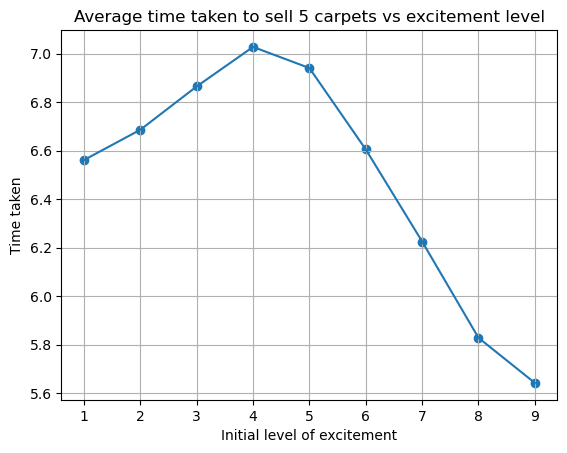

In [153]:
avg_time = np.zeros(len(initial_levels))
for i, start_level in enumerate(initial_levels): 
    
    avg_time[i] = np.mean(times_to_sell_levels[i])
    
plt.plot(initial_levels, avg_time)
plt.scatter(initial_levels, avg_time)
plt.xlabel('Initial level of excitement')
plt.ylabel('Time taken')
plt.title('Average time taken to sell 5 carpets vs excitement level')
plt.grid()
    

f) (w=1) In point d) and e), excluding the runs that didn’t sell enough carpets is
underestimating the number of steps needed to sell 5 carpets. Plot the probability of
selling less than 5 carpets in T timesteps as a function of the initial level of
excitement.


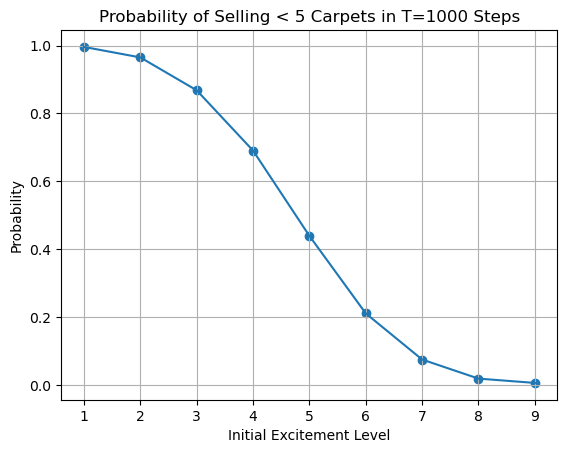

In [154]:
prob_not_sold = np.array(times_not_sold_levels)/num_simulations
plt.plot(initial_levels, prob_not_sold)
plt.scatter(initial_levels, prob_not_sold)
plt.title('Probability of Selling < 5 Carpets in T=1000 Steps')
plt.xlabel('Initial Excitement Level')
plt.ylabel('Probability')
plt.grid(True)

g) (w=1) In d) you obtained some definite functional form(s) for certain level(s) of initial
excitement. Why does the current process produce these functional forms? (If you
did not get these forms, you can still argue for them based on what you know.)

**Answer:**

The process in (d) produces negative **binomial distribution** as it models the probality to achieve the certain number of successes in a given time period. Although the probability varies with time steps at lower levels of excitement yet the process approximately satisfies the conditions at larger levels of excitement. At larger excitement levels, probability to achieve the certain number of successes in a given time period becomes constant since higher excitement tends to show more success and which reaches the peak and a saturated (constant level) probability. 



## Exercise - 2

Homogeneous (stationary) and inhomogeneous (nonstationary) Poisson processes:
Let’s take the Poisson process to describe radioactive decay. The number of nuclei is
initially 𝑁0 = 10 000. The decay (fission) rate for one nucleus is 𝜆"
= 0.2 per second.



In [155]:
N0 = 10000
lambda_c = 0.2

a)  Consider an ensemble of 𝑁0 = 10 000 nuclei, where the number of undecayed nuclei
is kept constant; in other words, every time a nucleus decays it is replaced by an
undecayed nucleus. The differential equation for the process is #$
= −𝜆" 𝑁&.
#%
Accordingly, the constant decay rate is 𝜆 = 𝜆" 𝑁&. Applying inverse distribution method
to the inter-event time distribution for this homogeneous Poisson process, simulate the
decay process.
(i) (w=2) Implement the algorithm. Indicate clearly the different parts and
functions.
(ii) (w=2) Compute mean values by averaging over 1000 simulations of the
following: The half time, i.e., the time it takes for 𝑁0/2 nuclei to decay, and the
variance of this half time.

**Solution:**
    
The time between consecutive decay events in a homogenous Poisson process follows an exponential distribution. 

CDF for an exponential distribution: 

F(t) = 1 - $e^{-\lambda t}$

By settting $F(t) \sim U(0,1)$

U = 1 - $e^{-\lambda t}$
$e^{-\lambda t}$ = 1 - U

$\lambda t$ = - ln(1 - U)

$t = \frac{- ln(1 - U)}{\lambda}$

1 - U is also uniformly distributed. So this simplifies to: 

$t = \frac{- ln(U)}{\lambda}$

In [156]:
# Radioactive decay for a homogenous Poisson process 
def homogenous_decay(N0, lambda_c): 
    
    lambda_t = lambda_c*N0 # Constant decay rate
    
    # number of decays to simulate for half time 
    
    half_decays = N0/2
    
    total_time = 0
    
    # Inter-event time distribution 
    
    # we generate random numbers at once instead of running a loop, each number representing a nuclei so total is half of the nuclei
    U = np.random.uniform(0,1, int(half_decays))
    
    # Using inverse distribution (from derivation above)
    inter_event_times = - np.log(U)/lambda_t
    
    # half-time
    total_time = np.sum(inter_event_times)
    
    return total_time


In [157]:
num_simulations = 1000
half_times_homogenous = []

# we run this simulation 1000 times to calculate the mean half time
for _ in range(num_simulations): 
    half_time = homogenous_decay(N0, lambda_c)
    half_times_homogenous.append(half_time)
    

mean_half_time_homo = np.mean(half_times_homogenous)

variance_half_time_homo = np.var(half_times_homogenous)

print("Homogenous Poisson process:")
print(f"Mean half-time: {mean_half_time_homo:.2f} s")
print(f"Variance of half-time: {variance_half_time_homo:.5f} $s^2$")

Homogenous Poisson process:
Mean half-time: 2.50 s
Variance of half-time: 0.00129 $s^2$


b)Next, consider an ensemble of 𝑁0 = 10 000 nuclei, where decayed nuclei are not
replaced. This affects the inter-event time distribution, and the process becomes
inhomogeneous as the decay rate will depend on time. The differential equation
#$
describing this process reads as
= −𝜆" 𝑁(𝑡), where the number of undecayed
#%
nuclei decreases exponentially, 𝑁(𝑡) = 𝑁&𝑒'(!%
. Applying inverse distribution method
to the pertinent time-dependent - as we have 𝜆(𝑡) - inter-event time distribution for
this inhomogeneous Poisson process, simulate the decay process.
(i) (w=2) Implement the algorithm. Indicate clearly the different parts and
functions.
(ii) (w=2) Compute mean values by averaging over 1000 simulations of the
following: The half time, i.e., the time it takes for 𝑁0/2 nuclei to decay, and the
variance of this half time.


Note. Above, 𝑁 = 〈𝑁〉, i.e. an ensemble average. Likewise, 𝑁(𝑡) = 〈𝑁(𝑡)〉, i.e. an
ensemble average at time 𝑡.


Note! Use the definitions of the lecture notes. There exists an alternative definition for the
parameters in the exponential distribution; do not use that.

**Solution:** 
    
Number of undecayed nuclei at time t: 

$ N(t) = N_0 e^{-\lambda_c t} $

Decay rate at time t

$ \lambda (t) = \lambda_c N_0 e^{-\lambda_c t}$


After k decays have occured, the number of remaining nuclei is $N_0$ - k. 

The decay rate for the next event is: 

$\lambda_k = \lambda_c (N_0 - k)$

In [158]:
# radioactive decay for an inhomogenous Poisson process
def inhomogenous_decay(N0, lambda_c): 
    
    total_time = 0.0
    # initial nuclei
    nuclei_remaining = N0
    
    decays_to_simulate = N0//2 # Since we are interested in half-time 
    
    # Since lambda is not constant, we do simulation decay by decay 
    for _ in range(decays_to_simulate): 
        
        current_lambda = lambda_c*nuclei_remaining # current decay based on how many nuclei are left
        
        # generate a uniform distribution 
        U = np.random.uniform(0,1)
        
        # use inverse distributio to calculate the time to wait for the next decay
        inter_event_time = -np.log(U)/current_lambda
        
        # update total time and number of nuclei left
        total_time += inter_event_time
        nuclei_remaining -= 1
        
    return total_time

In [159]:
# we run this simulation 1000 times to calculate the mean half time

num_simulations = 1000
half_times_inhomogenous = []
for _ in range(num_simulations): 
    
    half_time = inhomogenous_decay(N0, lambda_c)
    half_times_inhomogenous.append(half_time)
    
mean_in = np.mean(half_times_inhomogenous)
variance_in = np.var(half_times_inhomogenous)

print("Inhomogeneous Poisson Process:")
print(f"Mean half-time: {mean_in:.2f} s")
print(f"Variance of half-time: {variance_in:.5f} $s^2$")

Inhomogeneous Poisson Process:
Mean half-time: 3.46 s
Variance of half-time: 0.00263 $s^2$


# Assignment 4: Simulation of Homogeneous and Inhomogeneous Poisson Processes

In **Assignment 3**, we simulated radioactive decay processes using the **inversion distribution method** for inter-event times.  
In this assignment, we will use the **Poisson distribution** to obtain the *number of events* occurring in fixed time intervals.

---


## Problem Description

We have an ensemble of \( N_0 = 10\,000 \) nuclei, each of which decays independently with a rate per nucleus  
\[
\lambda_0 = 0.3 \, \text{s}^{-1}.
\]
The time step is \( \Delta t = 0.01 \, \text{s} \), so the elapsed time is \( t = \text{steps} \times \Delta t \).

We study two different cases:

1. **Homogeneous Poisson Process:** number of undecayed nuclei kept constant.
2. **Inhomogeneous Poisson Process:** number of undecayed nuclei decreases with time.

We will use `numpy.random.poisson` to draw the number of events (decays) in each time interval.

---

## (a) Homogeneous Poisson Process

### Theory

In this case, the total number of nuclei \( N_0 \) is kept constant.  
Whenever a nucleus decays, it is immediately replaced by a new one.

The decay rate for the entire system remains **constant**:
$
\lambda = \lambda_0 N_0.
$

The expected number of decay events in a small time interval \( \Delta t \) is:

$ \langle n \rangle = \lambda \Delta t = \lambda_0 N_0 \Delta t $

Since the system is stationary, this process is a **homogeneous Poisson process**.

We will simulate decay events until the cumulative number of decays reaches \( N_0 / 2 \) (the “half-time”).

---

### Algorithm

1. Set initial parameters \( N_0 = 10\,000 \), \( \lambda_0 = 0.3 \), and \( \Delta t = 0.01 \).
2. Compute total rate \( \lambda = \lambda_0 N_0 \).
3. For each time step:
   - Sample number of decays:  
     \[
     k = \text{Poisson}(\lambda \Delta t)
     \]
   - Update cumulative count of decayed nuclei.
4. Stop when cumulative decays ≥ \( N_0 / 2 \).
5. Record elapsed time \( t = \text{steps} \times \Delta t \) as the half-time.
6. Repeat the process for 1000 simulations to obtain mean and variance of the half-time.

---


### Discussion

Theoretically, the expected half-time \( t_{1/2} \) for a constant decay rate process is:
\[
t_{1/2} = \frac{\ln(2)}{\lambda_0} \approx 2.31 \, \text{s}.
\]

Since this simulation uses stochastic sampling, the mean of 1000 simulations should fluctuate around this theoretical value.  
The variance indicates how much the stochastic nature of decay affects the measured half-time.

---

## (b) Inhomogeneous Poisson Process

### Theory

In this case, the decayed nuclei are **not replaced**, so the number of undecayed nuclei decreases with time.

The differential equation is:
\[
\frac{dN}{dt} = -\lambda_0 N(t),
\]
whose solution is:
\[
N(t) = N_0 e^{-\lambda_0 t}.
\]

Now, the **rate of decay** depends on time:
\[
\lambda(t) = \lambda_0 N(t).
\]

Therefore, the expected number of decays in the time interval \( \Delta t \) is:
\[
\langle n(t) \rangle = \lambda_0 N(t) \Delta t.
\]

This process is **inhomogeneous**, as the rate decreases exponentially.

---

### Algorithm

1. Set initial parameters \( N_0 = 10\,000 \), \( \lambda_0 = 0.3 \), and \( \Delta t = 0.01 \).
2. Initialise \( N = N_0 \) and time \( t = 0 \).
3. For each time step:
   - Compute expected number of events \( \lambda_0 N \Delta t \).
   - Sample number of decays:  
     \( k = \text{Poisson}(\lambda_0 N \Delta t) \).
   - Update \( N = N - k \).
   - Increase time by \( \Delta t \).
4. Stop when \( N \leq N_0 / 2 \).
5. Record elapsed time as half-time.
6. Repeat 1000 simulations to compute mean and variance.

---
